In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
ts_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_pheno/TS_test_predictions.csv')
text_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_pheno/Text_test_predictions.csv')
cxr_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_pheno/CXR_test_predictions.csv')
multi_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_pheno/TS_CXR_Text_test_predictions.csv')

In [3]:
all_pred = pd.DataFrame(data={
        'TS': ts_pred['Predicted'],
        'Text': text_pred['Predicted'],
        'CXR': cxr_pred['Predicted'],
        'Multi': multi_pred['Predicted'],
    })
print(all_pred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TS      5295 non-null   object
 1   Text    5384 non-null   object
 2   CXR     5384 non-null   object
 3   Multi   5295 non-null   object
dtypes: object(4)
memory usage: 168.4+ KB
None


In [4]:
all_pred = all_pred.dropna()
print(all_pred.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 5294
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TS      5295 non-null   object
 1   Text    5295 non-null   object
 2   CXR     5295 non-null   object
 3   Multi   5295 non-null   object
dtypes: object(4)
memory usage: 206.8+ KB
None


In [14]:
print(all_pred.iloc[0])

TS              (0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Text            (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CXR             (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Multi           (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
pid_labels      [R, R, R, R, Umaj, Umin, Umaj, R, R, R, R, R, ...
voted_result                                                    R
Name: 0, dtype: object


In [6]:
def assign_pid(row):
    labels = []
    for ts, text, cxr, multi in zip(row['TS'], row['Text'], row['CXR'], row['Multi']):
        if ts == 0 and text == 0 and cxr == 0 and multi == 0:
            labels.append('R')
        elif ts == 0 and text == 0 and cxr == 1 and multi == 0:
            labels.append('Umaj')
        elif ts == 0 and text == 1 and cxr == 0 and multi == 0:
            labels.append('Umaj')
        elif ts == 0 and text == 1 and cxr == 1 and multi == 0:
            labels.append('Umin')
        elif ts == 1 and text == 0 and cxr == 0 and multi == 0:
            labels.append('Umaj')
        elif ts == 1 and text == 0 and cxr == 1 and multi == 0:
            labels.append('Umin')
        elif ts == 1 and text == 1 and cxr == 0 and multi == 0:
            labels.append('Umin')
        elif ts == 1 and text == 1 and cxr == 1 and multi == 0:
            labels.append('S')
        elif ts == 0 and text == 0 and cxr == 0 and multi == 1:
            labels.append('S')
        elif ts == 0 and text == 0 and cxr == 1 and multi == 1:
            labels.append('Umin')
        elif ts == 0 and text == 1 and cxr == 0 and multi == 1:
            labels.append('Umaj')
        elif ts == 0 and text == 1 and cxr == 1 and multi == 1:
            labels.append('Umaj')
        elif ts == 1 and text == 0 and cxr == 0 and multi == 1:
            labels.append('Umin')
        elif ts == 1 and text == 0 and cxr == 1 and multi == 1:
            labels.append('Umaj')
        elif ts == 1 and text == 1 and cxr == 0 and multi == 1:
            labels.append('Umin')
        elif ts == 1 and text == 1 and cxr == 1 and multi == 1:
            labels.append('R')
        else:
            labels.append(None)
    return labels

In [7]:
# Convert strings to tuples
def convert_to_tuple(col):
    return all_pred[col].apply(lambda x: ast.literal_eval(x))


In [8]:
for col in ['TS', 'Text', 'CXR', 'Multi']:
    all_pred[col] = convert_to_tuple(col)

In [9]:
# Extract the first label from the tuple and apply the assign_pid function
all_pred['pid_labels'] = all_pred.apply(assign_pid, axis=1)

print(all_pred.head())

                                                  TS  \
0  (0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  (1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...   
2  (1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...   
3  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  (0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...   

                                                Text  \
0  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
2  (1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   

                                                 CXR  \
0  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
from collections import Counter
def get_voted_result(labels):
    label_counts = Counter(labels)
    return label_counts.most_common(1)[0][0] if label_counts else None

In [17]:
# Add voted result column
all_pred['voted_result'] = all_pred['pid_labels'].apply(get_voted_result)

In [21]:
all_pred['voted_result']

0       R
1       R
2       R
3       R
4       R
       ..
5290    R
5291    R
5292    R
5293    R
5294    R
Name: voted_result, Length: 5295, dtype: object

Counts Table:
  voted_result  Count
0            R   5293
1         Umin      2


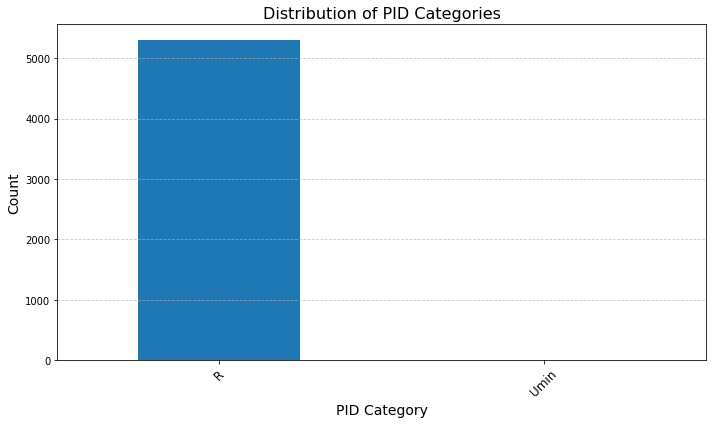

In [12]:
# Calculate the counts for each PID category
pid_counts = all_pred['voted_result'].value_counts()

# Create a counts table
counts_table = pid_counts.reset_index()
counts_table.columns = ['voted_result', 'Count']

# Display the counts table
print("Counts Table:")
print(counts_table)

# Plot the distribution
plt.figure(figsize=(10, 6))
pid_counts.plot(kind='bar')
plt.title('Distribution of PID Categories', fontsize=16)
plt.xlabel('PID Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()